# Questions 1, 2, 3

In [60]:
import matplotlib.image as mpimg

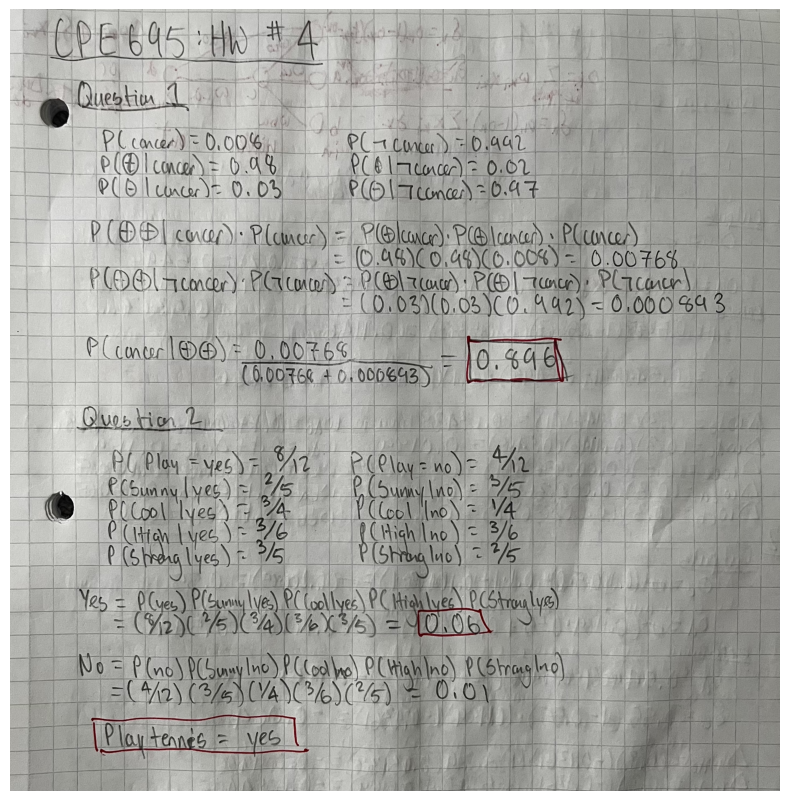

In [59]:
pix = mpimg.imread("HW4_1.jpg")

plt.figure(figsize=(8,16))
plt.axis('off')
plt.imshow(pix)
plt.show()

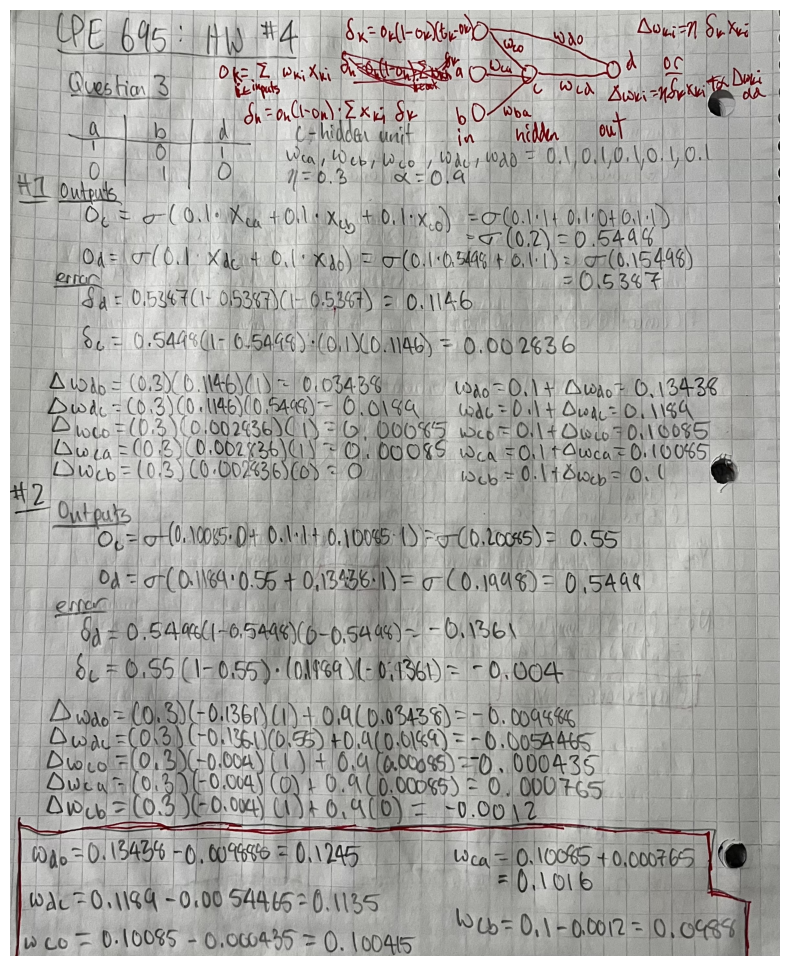

In [61]:
pix = mpimg.imread("HW4_2.jpg")

plt.figure(figsize=(8,16))
plt.axis('off')
plt.imshow(pix)
plt.show()

# Question 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

Step 1

In [5]:
data = pd.read_csv("Titanic.csv")
data.age.fillna(data.age.mean(), inplace=True)
data.fare.fillna(data.fare.mean(), inplace = True)
data.body.fillna(data.body.mean(), inplace = True)
data.replace({"1st": 1, "2nd": 2, "3rd": 3}, inplace = True)
data.replace({"male": 1, "female": 0}, inplace = True)

In [6]:
X = data[["pclass", "sex", "age", "sibsp"]].values
y = data["survived"].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

Step 2

Model 1

In [40]:
clf = MLPClassifier(hidden_layer_sizes = (20, 20), activation = "logistic", 
                    solver = "adam", alpha = 1E-5, random_state = 100, max_iter = 1000)

Model 2

In [35]:
clf1 = MLPClassifier(hidden_layer_sizes = (20,30,20), activation = "logistic", 
                     solver = "adam", alpha = 1E-5, random_state = 100, max_iter = 1000)

The second MLP classifier has a different structure with more hidden layers. This will end up affecting the accuracy of the model in comparison to the first model structure. Same number of neurons and more layers allows the model to become more general, reduce overfitting, and increase efficiency.

Step 3

In [41]:
np.random.seed(100)
titanic = clf.fit(X_train, y_train)
y_pred = titanic.predict(X_test).reshape(-1,1)
print("Accuracy: ", metrics.accuracy_score(y_pred, y_test))

Accuracy:  0.8053435114503816


In [37]:
np.random.seed(100)
titanic1 = clf1.fit(X_train, y_train)
y_pred1 = titanic1.predict(X_test).reshape(-1,1)
print("Accuracy: ", metrics.accuracy_score(y_pred1, y_test))

Accuracy:  0.8015267175572519


The above accuracy scores show that the network with two hidden layers, each with 20 neurons, outperforms the network with 3 hidden layer having 20, 30, and 20 neurons respectively. Although the accuracies for model 1 and model 2 are not too far apart, we can see that having less layers can improve accuracy on the training data. Let's see how each model does on the sample accuracies.

In [42]:
survive = metrics.accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatal = metrics.accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
print("Percent Survivors Correctly Predicted: ", survive)
print("Percent Fatalities Correctly Predicted: ", fatal)

Percent Survivors Correctly Predicted:  0.6736842105263158
Percent Fatalities Correctly Predicted:  0.8802395209580839


In [39]:
survive1 = metrics.accuracy_score(y_test[y_test == 1], y_pred1[y_test == 1])
fatal1 = metrics.accuracy_score(y_test[y_test == 0], y_pred1[y_test == 0])
print("Percent Survivors Correctly Predicted: ", survive1)
print("Percent Fatalities Correctly Predicted: ", fatal1)

Percent Survivors Correctly Predicted:  0.6421052631578947
Percent Fatalities Correctly Predicted:  0.8922155688622755


Above are the percent survivors correctly predicted and percent fatalities correctly predicted for model 1 and model 2 respectively. From the sample accuracies above we can see that model 2 predicts survivors with higher accuracy when compared to model 1, however model 1 predicts fatalaties with a higher accuracy than model 2. Both models sample accuracies are similar, same with their accuracy scores, showing that this classification problem can be solved with just 2 hidden layers if necessary. 

Step 4

In [32]:
np.random.seed(42)
forest_clf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 18)
titanic_forest = forest_clf.fit(X_train, y_train)

y_pred2 = forest_clf.predict(X_test)

survive2 = metrics.accuracy_score(y_test[y_test == 1], y_pred2[y_test == 1])
fatal2 = metrics.accuracy_score(y_test[y_test == 0], y_pred2[y_test == 0])
print("Percent Survivors Correctly Predicted: ", survive2)
print("Percent Fatalities Correctly Predicted: ", fatal2)

Percent Survivors Correctly Predicted:  0.6526315789473685
Percent Fatalities Correctly Predicted:  0.8802395209580839


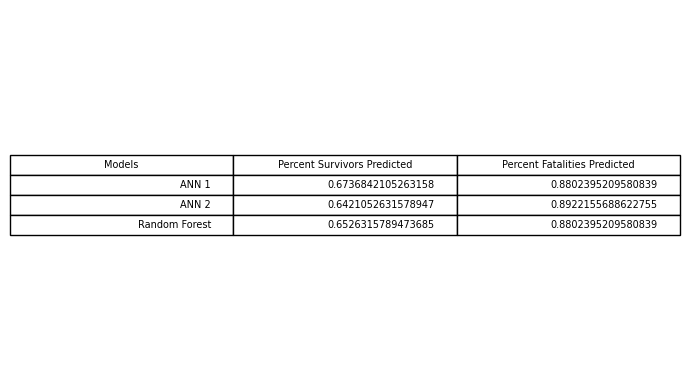

In [55]:
plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
columns = ["Models", "Percent Survivors Predicted", "Percent Fatalities Predicted"]
data = [["ANN 1", survive, fatal], 
["ANN 2", survive1, fatal1],
["Random Forest", survive2, fatal2]]
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=data, colLabels=columns, loc='center')
plt.show()

From the table above we can see the breakdown between the 3 models. Model 1, the first artificial neural network, has the highest percent survivors predicted, and the same percent fatalaties predicted as the Random Forest from HW 3. Model 2, the second artificial neural network, has the lowest percent survivors predicted correct, but has a highest percent of fatalities predicted correct. The Random Forest Classifier has the same percent fatalities predicted as model 1, but a lower percent survivors predicted. From these results we can see that these three different algorithms all perform at a similar level with the given data, but these results suggest that the first neural network model is the best of the 3. Two hidden layers each with 20 neurons had the highest accuracy score, showing that this classification problem can be solved at a high level with just two hidden layers. The above MLP Classifiers were just randomly structured by me, in order to find the optimal model one could use either GridSearchCV or RandomizedSearchCV to finely tune the hyperparameters for an improved model. 